# Supervised Machine Learning Tutorial #

Willkommen zum Tutorial zu Supervised Machine Learning in Python. In diesem Tutorial werden wir mittels verschiedener Bibliotheken einen Datensatz analysieren. Dabei erstellen wir auch selbst Modelle, um das Überleben von Passagieren auf der Titanic vorherzusehen.

## Data Exploration ##

### Importieren von Bibliotheken ###

In diesem Tutorial nutzen wir verschiedene Bibliotheken:
* [`pandas`](https://pandas.pydata.org/) zum Einlesen und Verarbeiten der Daten. Sie können sie schon aus dem entsprechenden Tutorial kennen
* [`seaborn`](https://seaborn.pydata.org/) ist eine Erweiterung von `matplotlib`, die schönere Graphen einfacher macht.
* [`pyplot`](https://matplotlib.org/stable/api/pyplot_summary.html) benötigen wir, um einige Detailanpassungen an den Graphen von `seaborn` vorzunehmen
* [`scikit-learn`](https://scikit-learn.org/stable/index.html) ist eine Machine Learning Library, die uns verschiedenste Machine Learning Funktionen anbietet. In diesem Tutorial nutzen wir vier verschiedene Klassifikatoren und ein paar Datenverarbeitungsschritte sowie ein paar Auswertungsmetriken. Da die Bibliothek selbst sehr viel mehr Möglichkeiten enthält, importieren wir nur diese ausgewählten Teile.
* `IPython` wird genutzt, um Bilder in diesem Tutorial anzuzeigen.


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

### Datenimport ###

Zuerst lesen wir die Daten aus der Datei `titanic.csv` mittels `pandas` in einen `dataframe` ein. Wir gehen dabei davon aus, dass die Datei im gleichen Verzeichnis wie dieses Notebook liegt.

In [2]:
df = pd.read_csv("titanic.csv")

Um einen Überblick über den Datensatz zu bekommen, können wir über das `head`-Kommando die Header jeder Spalte sowie die ersten 5 Zeilen des Datensatzes betrachten.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Wir stellen fest, dass jeder Passagier eine aufsteigende *PassengerID* , einen Namen (*Name*), ein Geschlecht (*Sex*), ein Alter (*Age*), eine Klasse (*Pclass*) und einen Fahrpreis (*Fare*) hat. Bei der Kabinennummer (*Cabin*) sehen wir bereits, dass diese Information nicht für alle Gäste vorliegt. Die Spalte *SibSp* gibt an, mit wie vielen nahe Verwandten (Geschwister bzw. Ehepartner) und die Spalte *Parch* mit wie vielen Eltern bzw. Kindern ein Passagier gereist ist. Die Spalte *Embarked* gibt den Hafen des Zustiegs an (Southampton, Cherbourg und Queenstown)

Nun, da wir einen Überblick über die Semantik der Spalten gewonnen haben, versuchen wir auch, einen Überblick über den Inhalt des Datensatzes zu bekommen. Dafür rufen wir `info()` auf unserem Datensatz auf.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Wir erhalten eine Zusammenfassung zu jeder Spalte. Sowohl der Datentyp, als auch die Anzahl der validen Werte pro Spalte (*Non-Null Count*) wird angegeben. Während alle Datentypen stimmen, sehen wir, dass das Alter nur für 714 der 891 Passagiere bekannt ist. Auch die Kabinennummer und der Herkunftshafen enthalten leere Einträge. Solche Einträge können bei verschiedenen ML-Algorithmen zu fehlerhaften Verhalten führen, sodass wir vor Erstellen unserer Modelle eine Reinigung der Daten vornehmen müssen.

Um genauere Informationen und erste statistische Werte zu den einzelnen Spalten zu erhalten, nutzen wir die `describe`-Methode.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


So erhalten wir zu jeder nummerischen Spalte den Mittelwert, die Standardabweichung, Mini- und Maximum so wie die Quartile. Wir können zum Beispiel auf den ersten Blick sehen, dass die Überlebensquote bei 38,3% liegt und das Durchschnittsalter bei etwa 29,7 Jahren.

Bei kategorischen Werten können wir uns die einzigartigen Werte anschauen, indem wir `unique()` auf der entsprechenden Spalte aufrufen.

In [6]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

So sehen wir hier zum Beispiel, dass die Kürzel der drei vorher genannten Häfen neben dem leeren Wert die einzigen Werte sind.

Nun betrachten wir die Daten etas genauer. Zuerst prüfen wir, ob die Überlebensrate bei Frauen tatsächlich höher war als bei Männern. Dafür wählen wir zuerst alle Passagier mit dem Geschlecht `female` aus.

In [7]:
women = df.loc[df.Sex == 'female']
women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Nachdem wir nun die für die Überlebensquote relevanten *Zeilen* gewählt haben, beschränken wir nun auch die *Spalten* auf `survived`.

In [8]:
women = women['Survived']
women

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

Jetzt müssen wir nur noch die Anzahl der Überlebenden (`survived=1`) durch die Gesamtzahl der Frauen teilen, um die Überlebensrate zu bestimmen.

In [9]:
survival_rate_women = sum(women)/len(women)
survival_rate_women

0.7420382165605095

**Aufgaben**:
1.  Bestimmen Sie, wie viele Klassen es an Bord der Titanic gab
2.  Bestimmen Sie das maximale Alter eines männlichen Passagiers
3.  Bestimme Sie die Überlebensrate der Passagiere in der ersten Klasse

In [24]:
count_Pclass = df["Pclass"].unique()
print(f"Es gibt {count_Pclass.shape[0]} verschiedene Klassen")

max_male_age = df.loc[df["Sex"] == "male"].Age.max()
print(f"Der älteste Männliche Passagier war {max_male_age} Jahre alt.")

passenger_first_class =  df.loc[df["Pclass"] == 1]

survival_rate_first_class = sum(passenger_first_class.Survived)/passenger_first_class.shape[0]

print(f"Die Überlebensrate bei Reisenden der 1. Klasse beträgt { round(survival_rate_first_class,2)} %")

Es gibt 3 verschiedene Klassen
Der älteste Männliche Passagier war 80.0 Jahre alt.
Die Überlebensrate bei Reisenden der 1. Klasse beträgt 0.63 %


## Datenvisualisierung ##

Die `seaborn`-Bibliothek ist eine große Hilfe, um matplotlib-Code zu vereinfachen und ermöglicht viele Grafiken mit nur einer Zeile Code. So zum lässt sich zum Beispiel mit einem `countplot` die Anzahl der Passagiere pro Geschlecht plotten. Da `seaborn` mit Hilfe von `matplotlib` arbeitet, können wir durch eine Änderung in `pyplot` (importiert als `plt`) die Y-Achse korrekt labeln.

Text(0, 0.5, 'Anzahl')

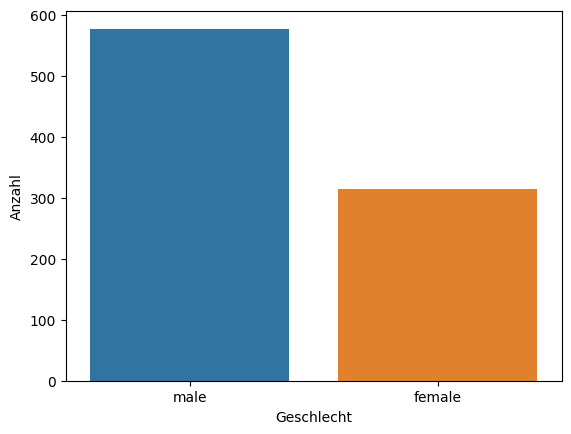

In [25]:
sns.countplot(data=df, x='Sex').set_xlabel('Geschlecht')
plt.ylabel("Anzahl")

Wir können auch ein Säulendiagramm (`barplot`) nutzen, um die Überlebensrate nach Geschlecht darzustellen. Dafür übergeben wir als `y`-parameter die Säule *Survived*. Seaborn stellt für uns dann den Durchschnitt des `y`-Werts (hier **Survival**) für jede Kategorie der `x`-Achse (hier **sex**) dar, was hier genau der Überlebensrate entspricht.

Text(0, 0.5, 'Überlebensrate')

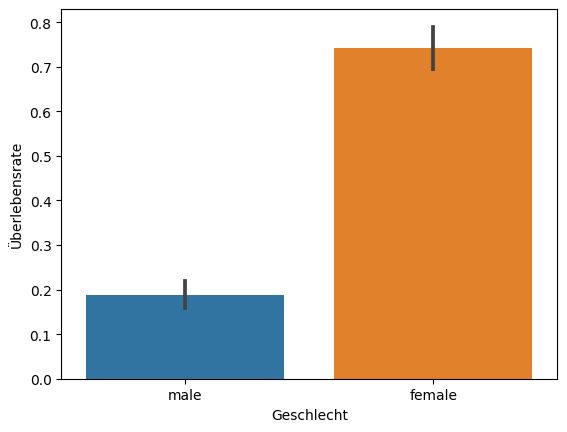

In [26]:
sns.barplot(data=df, x='Sex', y='Survived').set_xlabel('Geschlecht')
plt.ylabel("Überlebensrate")

Als Nächstes erstellen wir ein Histogramm mithilfe der Funktion `histplot`. Wir teilen dabei in 20 `bins` entsprechend des Alters. Zusätzlich zeigen wir eine geglätte Kurve (`kernel density estimat`) über die Verteilung an.

Text(0, 0.5, 'Anzahl')

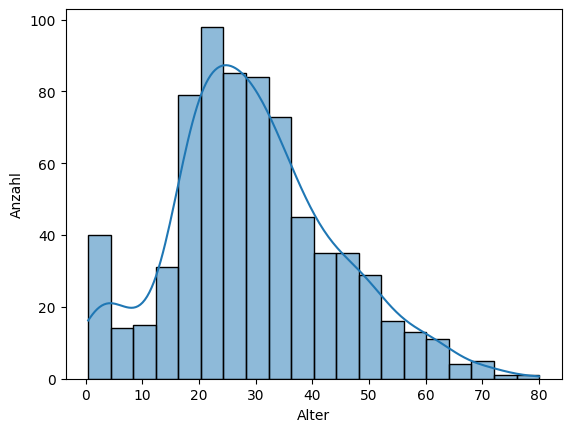

In [27]:
sns.histplot(data=df, x='Age', bins=20, kde=True).set_xlabel('Alter')
plt.ylabel("Anzahl")

Zum Schluss erzeugen wir ein Streudiagramm (`scatterplot`), dass das Alter und den Fahrtpreis der Passagiere in Kombination zeigt. Dabei lassen wir einzelne Punkte so einfärben, dass man ihre Klasse erkennen kann (`hue`).

Text(0, 0.5, 'Fahrtpreis')

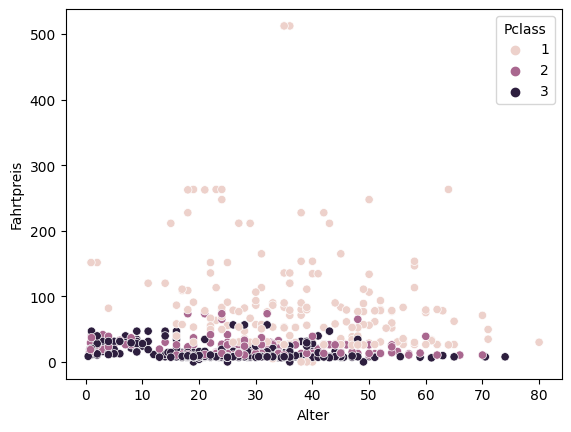

In [28]:
sns.scatterplot(df, x="Age", y="Fare", hue = "Pclass").set_xlabel("Alter")
plt.ylabel("Fahrtpreis")

**Aufgaben**
1.  Erstellen Sie ein Säulendiagramm über das Durchschnittsalter pro Klasse
2.  Erstellen Sie ein Säulendiagramm, dass die Anzahl der Passagiere pro Klasse darstellt.
3.  Erstellen Sie ein Histogramm über den Fahrtpreis mit 20 Bins.

Text(0, 0.5, 'Durchschnittsalter')

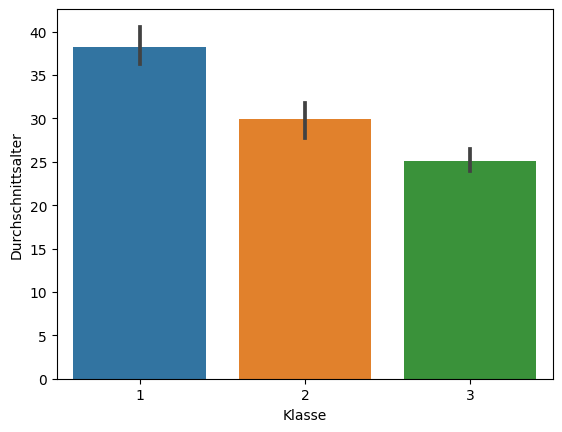

In [41]:
sns.barplot(data=df, x='Pclass', y='Age').set_xlabel('Klasse')
plt.ylabel("Durchschnittsalter")

Text(0, 0.5, 'Anzahl')

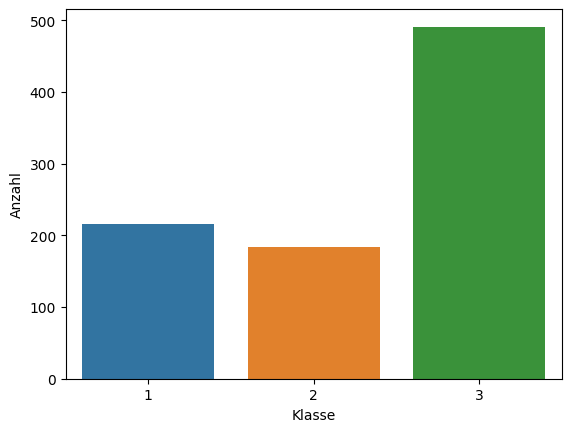

In [42]:
sns.countplot(data=df, x='Pclass').set_xlabel('Klasse')
plt.ylabel("Anzahl")

Text(0, 0.5, 'Anzahl')

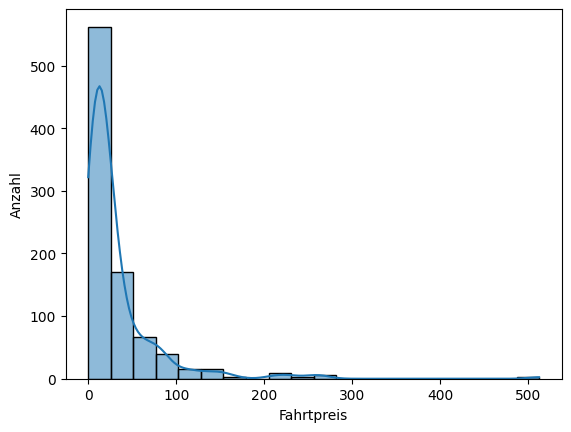

In [43]:
sns.histplot(data=df, x='Fare', bins=20, kde=True).set_xlabel('Fahrtpreis')
plt.ylabel("Anzahl")

## Datenvorverarbeitung ##

Wie wir bereits gesehen haben, sind Teile unserer Daten noch nicht bereit dafür, als Eingabe für ML-Algorithmen zu dienen. Wir brauchen vollständige Datensätze mit numerischen Daten, weswegen wir fehlerhafte Einträge korrigieren müssen. Außerdem sollten wir unseren Datensatz in ein training und ein test set aufteilen.

Zuerst betrachten wie die Spalte *Sex*. Hier haben wir kategorische Daten, sodass wir ohne weiteres die Werte für `female` und `male` in 0 und 1 umwandeln können. Wir nutzen hierfür die `replace`-Funktion des Data Frames. Wir ändern hierfür direkt den Dataframe, den wir vorher erstellt haben `inplace=True`, weshalb Code in früheren Zellen danach fehlerhaft sein könnte.

In [45]:
df['Sex'].replace('female', 0, inplace=True)
df['Sex'].replace('male', 1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Da die *Embarked* Spalte nur drei verschiedene Werte hat, erstellen wir eine neue Spalte für jeden Wert (**one hot Kodierung**). Da wir Passagiere haben, deren Zustieg unbekannt ist, ersetzen fehlende Angaben durch 0, um spätere Fehler zu vermeiden. Da hier nicht `ìnplace` ersetzt wird, wird bei jeder Operation ein neuer Vektor erzeugt.

In [46]:
df['Embarked_Q']=df['Embarked'].replace('Q',1).replace('C',0).replace('S',0)
df['Embarked_C']=df['Embarked'].replace('Q',0).replace('C',1).replace('S',0)
df['Embarked_S']=df['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
df.fillna({'Embarked_Q':'0', 'Embarked_C':'0', 'Embarked_S':'0'}, inplace=True)

Auch das Alter (*Age*) ist bei einigen Passagieren unbekannt. Anstatt das Alter auf 0 zu setzen (so viele Neugeborene würden unsere Algorithmen mit Sicherheit verwirren), setzen Sie das Durchschnittsalter der Titanic-Passagiere ein.

**Aufgabe:** Ersetzen Sie alle fehlenden Einträge in der Spalte Alter durch das Durchschnittsalter der Passagiere

In [49]:
mean_age = df.Age.mean()
df["Age"].fillna(mean_age, inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_C,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


Nun betrachten wir die anderen Spalten in unserem Dataframe und überlegen, ob wir diese weiter brauchen. *PassengerId*, *Name* und *Ticket* sollten keinen Einfluss auf die Überlebenschancen haben. Die Kabinennummer (*Cabin*) ist in zu wenigen Datensätzen enthalten, um sinnvoll genutzt zu werden. Die Spalte *Embarked* wird bereits durch die drei neuen Spalten ersetzt. Diese Spalten können also aller entfernt werden.

In [50]:
df = df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    object 
 8   Embarked_C  891 non-null    object 
 9   Embarked_S  891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Jetzt sieht unser Datensatz schon ganz gut aus. Wir möchten einen ML-Algorithmus darauf trainieren, das Überleben der Passagiere basierend auf den anderen Attributen vorherzusagen. Also können wir die *survived* Spalte als **Ziel** für unsere Klassifikation nutzen, während wir die anderen Spalten als **Input Features** nutzen wollen. Normalerweise wird dies notiert als Variablen `y` und `X`.

In [51]:
X = df.drop(columns = ['Survived'])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_C,Embarked_S
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [52]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Wir haben ein letztes Problem: Die Spalten *Age* und *Fare* enthalten sehr hohe absolute Werte. Bei manchen Machine Learning Algorithmen führen so hohe Werte dazu, dass diese Spalten einen wesentlich höheren Einfluss auf das Ergebnis haben, als gerechtfertigt wäre, worunter die Modellperformance leidet. Aus diesem Grund werden die Input Features in einen gemeinsamen Wertebereich skaliert. Hierfür nutzen wir den `StandardScaler` von scikit-learn.

In [53]:
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

Zum Schluss teilen wir unsere Daten mithilfe des `train_test_split` von scikit-learn in ein Training- und ein Test Set. Unser Testset entspricht einem viertel des originalen Datensatzes.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_C,Embarked_S
344,2,1,0.484880,0,0,-0.386671,0.0,0.0,1.0
321,3,1,-0.207709,0,0,-0.489442,0.0,0.0,1.0
460,1,1,1.408333,0,0,-0.113846,0.0,0.0,1.0
470,3,1,0.000000,0,0,-0.502445,0.0,0.0,1.0
713,3,1,-0.053800,0,0,-0.457478,0.0,0.0,1.0


Auf den ersten Blick sieht man, das die Daten nicht nur geteilt, sondern auch gemischt wurden. Das Shufflen der Daten vor dem Training ist wichtig, da manche ML Modelle sonst eine Klassifikation basierend auf der Reihenfolge der Daten und nicht den eigentlichen Features entwickeln könnten. Das wäre in der Anwendung natürlich kontraproduktiv

## Trainieren und Testen von Machine Learning Modellen ##

Es wird also endlich Zeit, unsere ersten ML Modelle zu trainieren und zu erstellen. Wir starten mit einem Entsscheidungsbaum

### Decision Tree Classifier ###

Ein Entscheidungsbaum-Klassifikator konstruiert einen Entscheidungsbaum mit den gegebenen Trainingsdaten und verwendet ihn dann zur Vorhersage neuer Daten zur Testzeit. Hier ist ein relativ einfaches Beispiel für einen Entscheidungsbaum, der aus den ersten 21 Zeilen unseres Titanic-Datensatzes erstellt wurde:

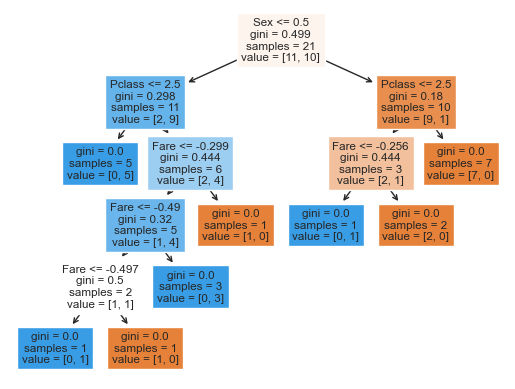

In [55]:
Image("decision_tree.png")

Das Nutzen eines Entscheidungsbaums zur Vorhersage (*Inferenz*) ist einfach zu verstehen. Bei einem neuen Passagier mit den Attributen Geschlecht, Alter, Kabinenklasse usw. beginnen wir oben am Wurzelknoten und fragen, ob das Geschlecht des Passagiers (Spalte mit Index 1) $\leq$ 0,5 ist. Wenn ja (entsprechend "männlich"), gehen wir den linken Zweig hinunter, wenn nein (entsprechend "weiblich"), gehen wir den rechten Zweig hinunter. Am nächsten Knoten wählen wir wieder den Weg, der von den Eigenschaften des Passagiers abhängt, bis wir einen Blattknoten erreichen, an dem eine Vorhersage über das Schicksal des Passagiers getroffen wird.

*Samples* gibt an, wie viele Passagiere aus den Trainingsdaten diesen Knoten überhaupt erreicht haben, und *Value* gibt an, wie viele von ihnen überlebt haben und wie viele gestorben sind. Die Farbe stellt auch den Anteil der Überlebenden dar, wobei Orange für eine hohe und Blau für eine niedrige Überlebensrate steht. Der Knoten oben links sagt uns zum Beispiel, dass 11 Passagiere diesen Knoten erreicht haben (weil sie männlich waren), von denen 2 überlebt haben und 9 gestorben sind.

Die Methode, mit der ein solcher Entscheidungsbaum konstruiert wird, ist etwas komplizierter. Ausgehend vom Wurzelknoten muss der Lernalgorithmus zunächst bestimmen, welches der Attribute als Entscheidungskriterium verwendet werden soll. Bei numerischen Attributen wie dem Alter stellt sich außerdem die Frage, wo die Entscheidungsgrenze gesetzt werden soll. Der Algorithmus löst dies, indem er alle Alternativen ausprobiert und sieht, welche am besten zwischen den Überlebensergebnissen diskriminiert. Der *Gini-Index* ist ein Maß für diesen Effekt, wobei 0 "perfekter Unterscheidungsfaktor" und 0,5 "völlig gleichmäßige Verteilung" anzeigt. In unserem Fall erwies sich das Geschlecht zunächst als der beste Prädiktor für das Überleben, da 9 der 10 Frauen und nur 2 der 11 Männer überlebten. Dieses Verfahren wird dann für die untergeordneten Knoten wiederholt, bis nur noch reine Knoten (Gini-Index = 0) übrig sind.

Nun versuchen wir, selbst so einen Entscheidungsbaum zu erzeugen. Das ist tatsächlich sehr einfach, da alle algorithmischen Komplexitäten von `scikit-learn` wegabstrahiert werden, sodass wir nur einen einfachen Funktionsaufruf benötigen.

In [56]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

Nachdem wir das Modell trainiert haben, können wir uns den Baum selbst betrachten. Da der Baum von der genauen Aufteilung in Trainings- und Testmenge abhängt, wird dieser Baum bei jedem von Ihnen anders aussehen. Er wird jedoch auf jeden Fall wesentlich größer sein als der zuvor gesehene Baum. Eventuell müssen Sie also mit den Parameter `figsize` und `fontsize` ein wenig finetunen, um den Baum in einer akzeptablen Größe zu erhalten. Die Erstellung des Plots kann ein paar Sekunden dauern.

[Text(0.3681191161087866, 0.975, 'Sex <= 0.5\ngini = 0.471\nsamples = 668\nvalue = [415, 253]'),
 Text(0.14278242677824268, 0.925, 'Pclass <= 2.5\ngini = 0.403\nsamples = 236\nvalue = [66, 170]'),
 Text(0.04602510460251046, 0.875, 'Age <= -2.093\ngini = 0.116\nsamples = 130\nvalue = [8, 122]'),
 Text(0.02510460251046025, 0.825, 'Parch <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.016736401673640166, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03347280334728033, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06694560669456066, 0.825, 'Fare <= -0.067\ngini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(0.0502092050209205, 0.775, 'Age <= 1.985\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(0.04184100418410042, 0.725, 'Fare <= -0.08\ngini = 0.174\nsamples = 52\nvalue = [5, 47]'),
 Text(0.03347280334728033, 0.675, 'Age <= -0.554\ngini = 0.145\nsamples = 51\nvalue = [4, 47]'),
 Text(0.02510460251046025, 0.625, 'gini = 0.0\nsamples = 11\nvalue

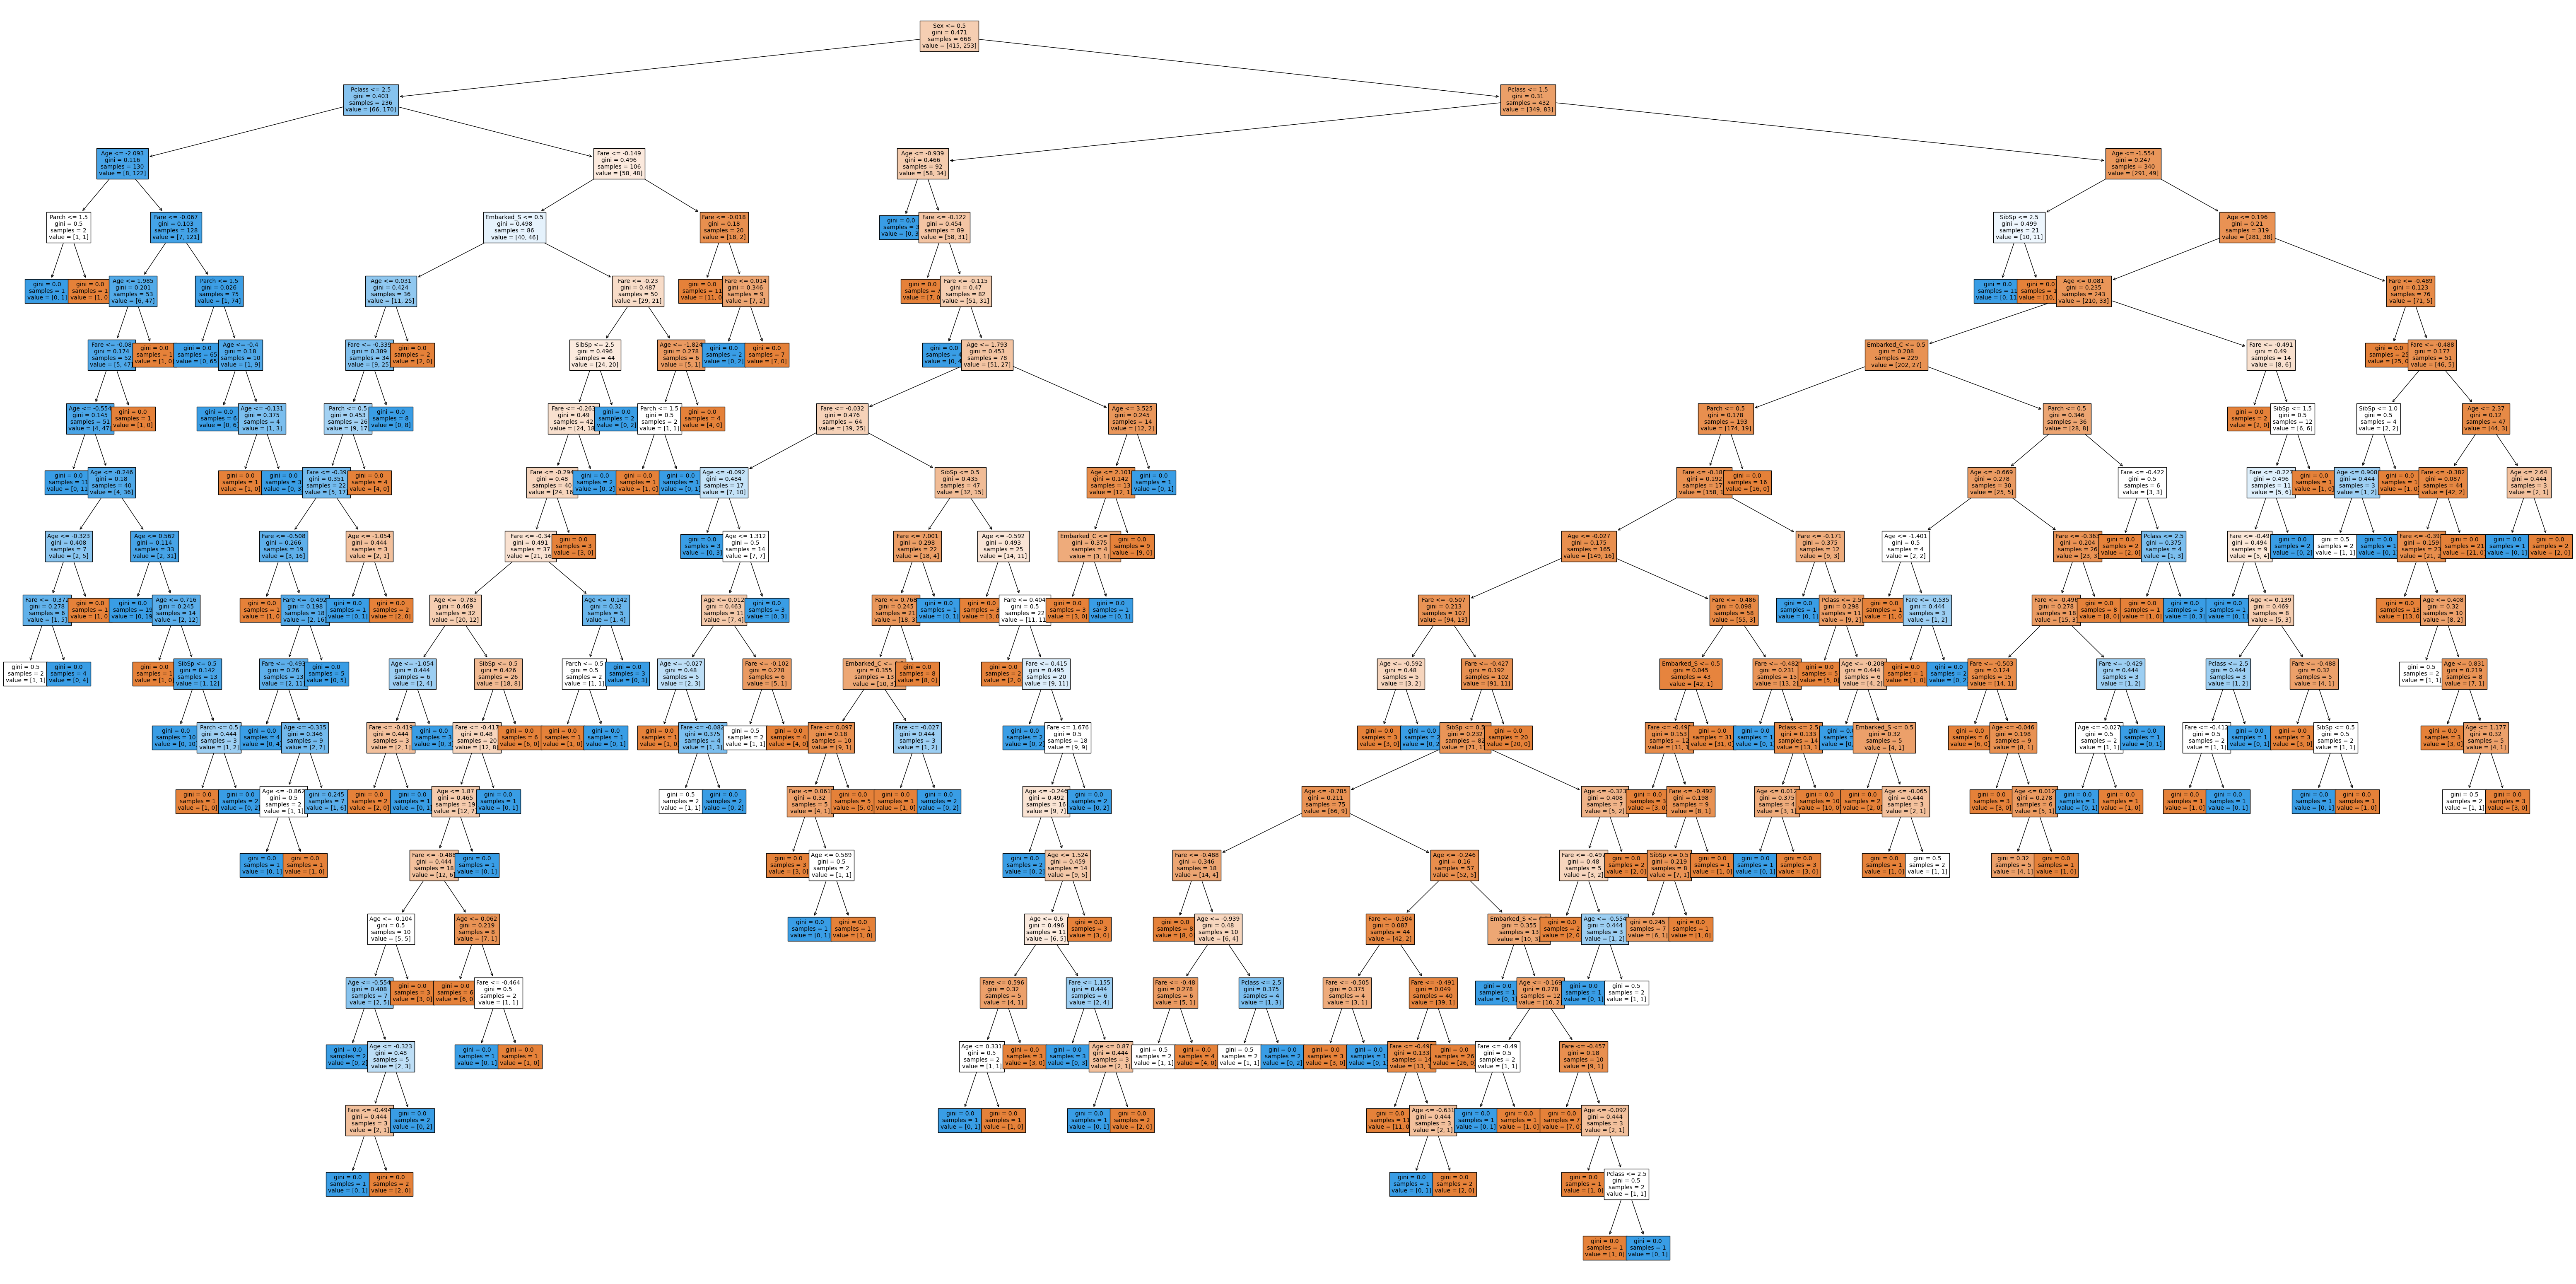

In [57]:
fig, ax = plt.subplots(figsize=(80, 40))
plot_tree(decision_tree, feature_names=list(X.columns), filled=True, fontsize=10, ax=ax)

Wir können das Modell nun auf unserem Test set einsetzen, und sehen, was dabei herauskommt:

In [58]:
predictions_tree = decision_tree.predict(X_test)
predictions_tree

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0])

Nun haben wir für jeden der 223 Passagiere im test set eine Schätzung abgegeben, ob er überlebt hat. Zum Vergleich betrachten wir hier die Daten der Labels:

In [59]:
y_test.to_numpy()

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0])

Wahrscheinlich werden Sie schon auf den ersten Blick Unterschiede sehen. Unser Model ist also nicht perfect. Um die Ungenauigkeit besser zu verstehen nutzen wir die tools von scikit-learn.

In [60]:
print(classification_report(y_test, predictions_tree))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       134
           1       0.75      0.74      0.75        89

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



* *Support* bezieht sich auf die Anzahl der Proben in jeder Kategorie in den Daten.
* *Accuracy* (Genauigkeit) bezieht sich darauf, wie viele Proben das Modell insgesamt prozentual richtig vorhergesagt hat. Dieses Maß ist in der Regel ausreichend, um die Leistung Ihres Modells zu beschreiben, wenn die Anzahl der positiven und negativen Proben in den Daten in der gleichen Größenordnung liegt. Bei sehr unausgewogenen Daten, z. B. in der medizinischen Diagnostik, wo viel mehr negative Proben als positive Proben vorhanden sind, ist es jedoch wichtig, auch andere Metriken zu betrachten.
* *Precision* (Präzision) beantwortet die Frage: "Von allen Proben, die das Modell für diese Kategorie *vorgesagt* hat, wie viele sind *wirklich* in dieser Kategorie?"
* *Recall* beantwortet die gegenteilige Frage: "Von allen Proben, die sich *eigentlich* in dieser Kategorie befinden, wie viele wurden von unserem Modell *vorgesagt*, dass sie in dieser Kategorie liegen?"
* *$F_1$-score* fasst die beiden vorherigen Maße zusammen. Er ist gegeben durch $\frac{\text{precision } \cdot \text{ recall}}{\text{precision } + \text{ recall}} \cdot 2$

Die Konfusionsmatrix (`confusion_matrix`) ist eine weitere Möglichkeit, die Leistungsmerkmale des Modells auszudrücken. Die y-Achse zeigt die Grundwahrheit, die x-Achse die Modellvorhersage an. Matrixeinträge stehen also für die Anzahl der wahren Negativen, der falschen Positiven, der wahren Positiven und der falschen Negativen. Ein gutes ML-Modell würde daher große Werte entlang der Diagonalen und kleine Werte an den anderen Stellen der Konfusionsmatrix erzeugen.


<AxesSubplot: >

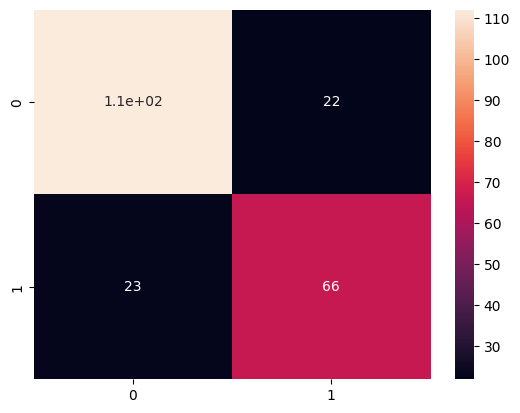

In [61]:
sns.heatmap(confusion_matrix(y_test, predictions_tree), annot=True)

Es ist von hoher Bedeutung, ein Modell nicht anhand seiner Performance auf den Trainings-, sondern auf den Testdaten zu beurteilen. Betrachten wir die Ergebnisse auf den Trainingsdaten, so wird das Modell sehr hohe Genauigkeiten liefern, da es diese Daten kennt.

In [62]:
print(classification_report(y_train, decision_tree.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       415
           1       1.00      0.95      0.97       253

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



Ein Modell soll allerdings nicht nur die Trainingsdaten auswendig lernen, sondern möglichst gute Muster erkennen, um auf *ungesehenen* Daten gut zu *generalisieren*. Aus diesem Grund haben wir bereits vorher die Ergebnisse auf einem dem Modell unbekannten Testdatensatz betrachtet.

### Random Forest Classifier ###

Ein Nachteil von Entscheidungsbäumen ist, dass sie dazu neigen, die Trainingsdaten zu *overfitten*, also jede einzelne Anomalität als wichtiges Signal wahrnehmen. Betrachten wir den kurzen Entscheidungsbaum von vorher entdecken wir im linken Teilbaum zwei aufeinanderfolgende Unterscheidungen mit *Fare* $\leq -0.49$ und *Fare* $\leq -0.497$:

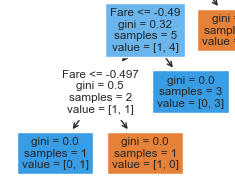

In [63]:
Image("decision_tree_cropped.png")

Hier haben alle Passagiere, die den obersten Knoten erreicht haben überlebt- mit einer Ausnahme. Da der (normalisierte) Fahrpreis dieser Person in $(-0.97,-0.497]$ lag und es sowohl Passagiere mit höheren als auch niedrigerem Preis gab, werden hier zwei Knoten genutzt, um diese aufzuteilen. Es ist aber sehr unrealistisch, dass genau dieser Preisunterschied einen entscheidenden Faktor im Überlebenskampf gespielt hat. Wahrscheinlich führt diese Unterscheidung also zu einer schlechteren Performance auf Testdaten.

Diese Art von Problem kann in gewisser Weise gelöst werden, indem Schwellenwerte für den Stichprobenumfang oder die Unreinheit festgelegt werden, die bestimmen, wann die Knoten weiter aufgeteilt werden sollen. Eine umfassendere Lösung ist der Ensemble-Ansatz: Random Forests.

Die Kernidee dieses Ansatzes besteht darin, eine Reihe verschiedener Entscheidungsbäume zu trainieren, jeden Baum eine Vorhersage für den neuen Datenpunkt erstellen zu lassen und dann die Mehrheitsentscheidung als endgültige Ausgabe zu verwenden. Entscheidungsbäume lassen sich schnell trainieren, sind aber auch deterministisch in Bezug auf die Trainingsdaten. Um die Vielfalt der Modelle zu gewährleisten, müssen wir zwei zusätzliche Schritte unternehmen:
1. *Bootstrapping* der Daten für jeden einzelnen Baum. Das bedeutet, dass ein Teildatensatz mit $n$ Datenpunkten $n$ mal zufällig - unter Berücksichtigung von Dopplungen - entnommen wird, um einen anderen Datensatz derselben Größe zu erstellen. Natürlich werden einige Datenpunkte in diesen Teildatensätzen mehrfach vorkommen, während andere überhaupt nicht vorhanden sind.
2. Jedes Mal, wenn ein Knoten geteilt werden soll, werden die Kandidaten für die Entscheidungsgrenzen auf eine zufällige Teilmenge der Attribute beschränkt. Dadurch wird die Vielfalt der Entscheidungsvariablen gewährleistet.

**Aufgabe:**
Erstellen und trainieren Sie ein Modell des `RandomForestClassifier` in der Variable `forest`. Lassen Sie sich danach die Ergebnisse ausgeben

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       134
           1       0.84      0.71      0.77        89

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



<AxesSubplot: >

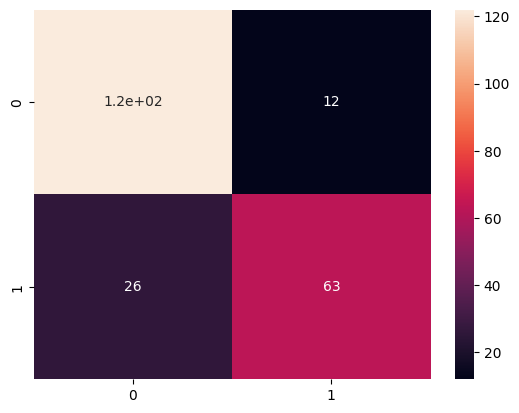

In [77]:
forest = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
forest.fit(X_train,y_train)

predictions = forest.predict(X_test)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

Ein *Random Forest*-Klassifikator lässt sich nicht so intuitiv darstellen wie ein einzelner Entscheidungsbaum. Es ist aber zumindest möglich, die Wichtigkeit (*importance*) auszulesen und zu plotten.

Text(0, 0.5, 'Wichtigkeit')

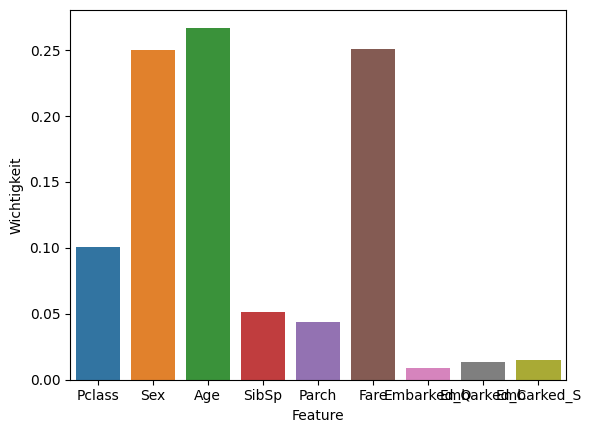

In [65]:
sns.barplot(x=X.columns, y=forest.feature_importances_).set_xlabel("Feature")
plt.ylabel("Wichtigkeit")

## Ausblick: Weitere Methoden

### Support Vector Machine ###

Ein weiterer bekannter und weit verbreiteter Klassifikator sind die sogenannten *Support Vector Machines* (SVMs). Hier wird ein Teil der Datenpunkte jeder Klasse als Stützvektor genutzt und eine Trenngerade mit möglichst großem Abstand zu den Punkten verschiedener Klassen gelegt. SVMs sind dabei teilweise in der Lage, durch den *Kernel Trick* gerade in höherdimensionalen Räumen zu beschreiben, wodurch sie auch nichtlineare Trenngeraden darstellen können.

**Aufgabe:**
Erstellen und trainieren Sie ein Modell des `SVC` (Support Vector Classificator). Lassen Sie sich danach die Ergebnisse ausgeben

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       134
           1       0.86      0.74      0.80        89

    accuracy                           0.85       223
   macro avg       0.85      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223



<AxesSubplot: >

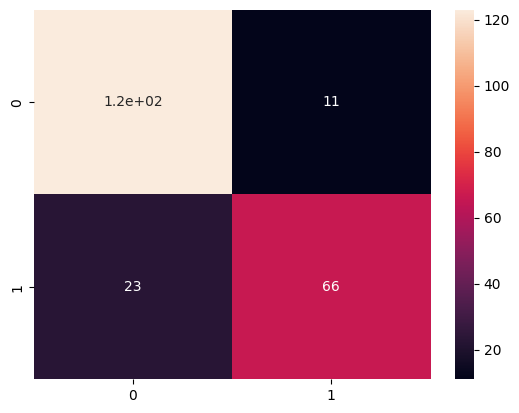

In [72]:
SVM = SVC()

SVM.fit(X_train, y_train)

predictions_SVM = SVM.predict(X_test)

print(classification_report(y_test, predictions_SVM))
sns.heatmap(confusion_matrix(y_test, predictions_SVM), annot=True)

## Neural Network ##

Zuletzt befassen wir uns mit einem einfachen Deep Learning Modell: Dem *Multi-Layer-Perceptron* (MLP). Dieses neuronale Netzwerk besteht aus in Layern angeordneten Neuronen. Ein Neuron summiert seine Eingänge auf und gibt 1 weiter, sofern die Summe einen gewissen Wert überschreitet. Der Output dient als Input für die neuronen des nächsten Layers, wobei der Wert mit einem Gewicht der Verbindung multipliziert wird. Das hier abgebildete MLP hat ein Input-Layer mit 5 Neuronen (grün), zwei hidden Layer (dunkel- und hellblau) mit 7 Neuronen und ein Output Layer mit 3 Neuronen. Im Verlauf des Trainings werden die Gewichte an den Verbindungen mittels *backpropagation* angepasst.

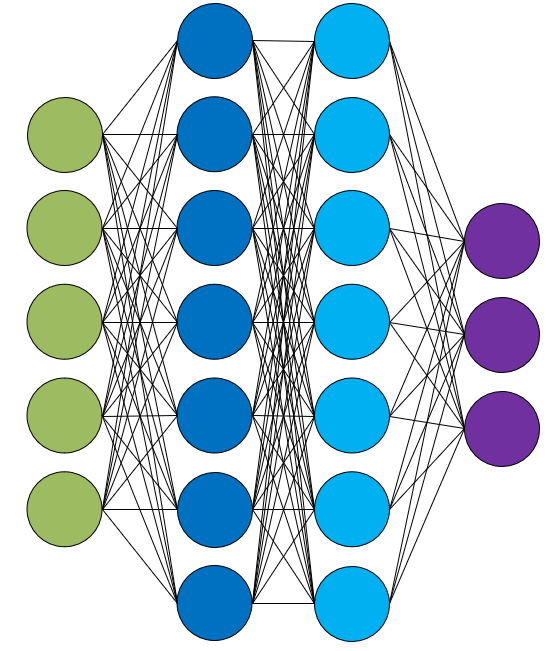

In [73]:
Image("mlp.png")

In `scikit-learn` kann man die Größe und Anzahl der hidden Layer einstellen ebenso wie die Anzahl der gleichzeitig verarbeiteten Trainingsdaten (*batch_size*) und die gesamte Anzahl der Trainingsinterationen (*max_iter*)

In [74]:
mlp = MLPClassifier(hidden_layer_sizes = (15, 15, 15, 15), batch_size=100, max_iter = 1000)

**Aufgabe:**
Trainieren Sie den MLP-Klassifikator und evaluieren Sie seine Performance

In [76]:
mlp.fit(X_train, y_train)
predictions_mlp = mlp.predict(X_test)

print(classification_report(y_test, predictions_mlp))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       134
           1       0.90      0.62      0.73        89

    accuracy                           0.82       223
   macro avg       0.85      0.79      0.80       223
weighted avg       0.83      0.82      0.81       223

